# C2M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Utilize contrasts to see how different pairwise comparison tests can be conducted.
2. Understand power and why it's important to statistical conclusions.
3. Understand the different kinds of post-hoc tests and when they should be used.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

# Problem 1: Contrasts and Coupons

Consider a hardness testing machine that presses a rod with a pointed tip into a metal specimen with a known force. By measuring the depth of the depression caused by the tip, the hardness of the specimen is determined.

Suppose we wish to determine whether or not four different tips produce different readings on a hardness testing machine. The experimenter has decided to obtain four observations on Rockwell C-scale hardness for each tip. There is only one factor - tip type - and a completely randomized single-factor design would consist of randomly assigning each one of the  4×4=16  runs to an experimental unit, that is, a metal coupon, and observing the hardness reading that results. Thus, 16 different metal test coupons would be required in this experiment, one for each run in the design.

In [1]:
tip    <- factor(rep(1:4, each = 4))
coupon <- factor(rep(1:4, times = 4))
y <- c(9.3, 9.4, 9.6, 10,
       9.4, 9.3, 9.8, 9.9,
       9.2, 9.4, 9.5, 9.7,
       9.7, 9.6, 10, 10.2)
hardness <- data.frame(y, tip, coupon)
hardness

y,tip,coupon
<dbl>,<fct>,<fct>
9.3,1,1
9.4,1,2
9.6,1,3
10.0,1,4
9.4,2,1
9.3,2,2
9.8,2,3
9.9,2,4
9.2,3,1


### 1. (a) Visualize the Groups

Before we start throwing math at anything, let's visualize our data to get an idea of what to expect from the eventual results.

Construct interaction plots for `tip` and `coupon` using ggplot(). Be sure to explain what you can from the plots.

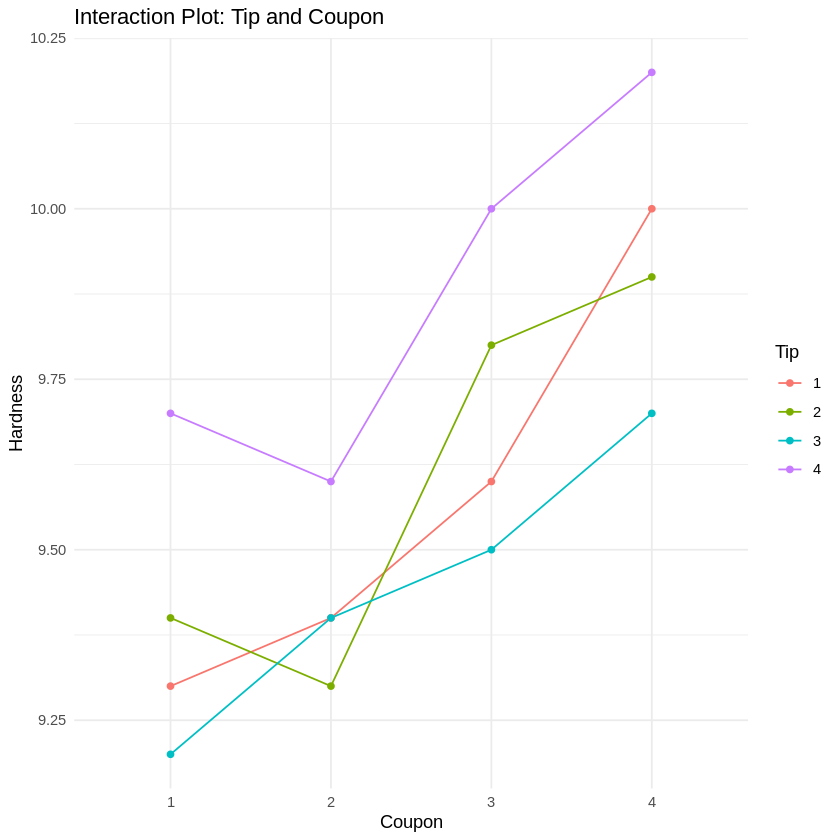

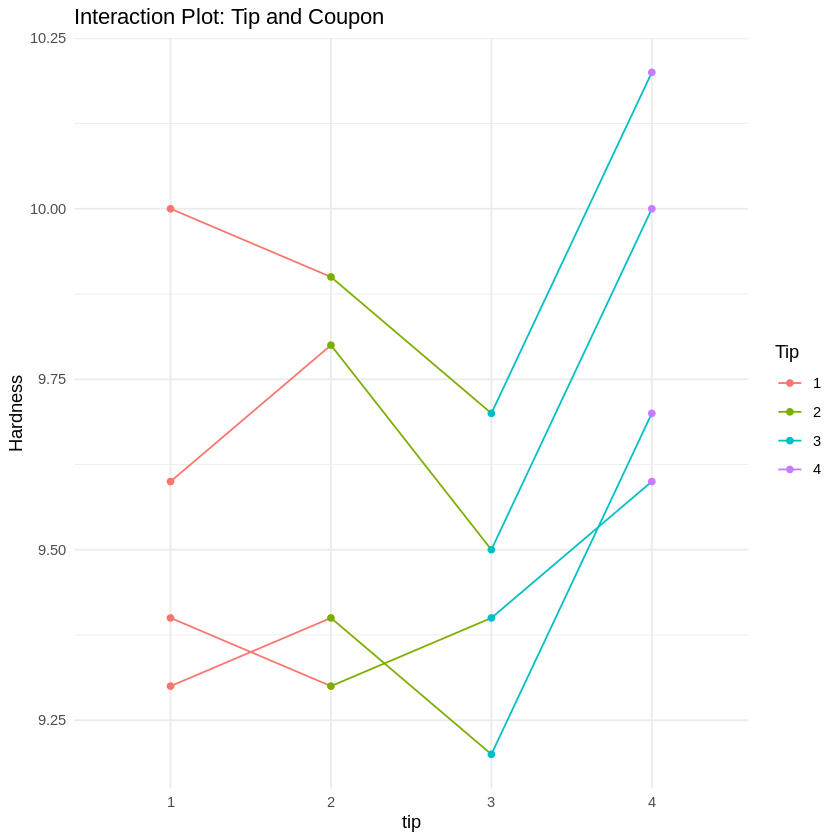

In [10]:
# Your Code Here
library(ggplot2)

ggplot(hardness, aes(x = coupon, y = y, color = tip, group = tip)) +
  geom_line() +
  geom_point() +
  labs(x = "Coupon", y = "Hardness", color = "Tip") +
  ggtitle("Interaction Plot: Tip and Coupon") +
  theme_minimal()

ggplot(hardness, aes(x = tip, y = y, color = tip, group = coupon)) +
  geom_line() +
  geom_point() +
  labs(x = "tip", y = "Hardness", color = "Tip") +
  ggtitle("Interaction Plot: Tip and Coupon") +
  theme_minimal()

The plots aren't clear and lack evidence of interactions, which makes it difficult to draw an conclusions. 

### 1. (b) Interactions

Should we test for interactions between `tip` and `coupon`? Maybe there is an interaction between the different metals that goes beyond our current scientific understanding!

Fit a linear model to the data with predictors `tip` and `coupon`, and an interaction between the two. Display the summary and explain why (or why not) an interaction term makes sense for this data.

In [7]:
# Your Code Here
lmod = lm(y ~ coupon + tip + tip:coupon, data = hardness)
summary(lmod)


Call:
lm(formula = y ~ coupon + tip + tip:coupon, data = hardness)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)   9.300e+00         NA      NA       NA
coupon2       1.000e-01         NA      NA       NA
coupon3       3.000e-01         NA      NA       NA
coupon4       7.000e-01         NA      NA       NA
tip2          1.000e-01         NA      NA       NA
tip3         -1.000e-01         NA      NA       NA
tip4          4.000e-01         NA      NA       NA
coupon2:tip2 -2.000e-01         NA      NA       NA
coupon3:tip2  1.000e-01         NA      NA       NA
coupon4:tip2 -2.000e-01         NA      NA       NA
coupon2:tip3  1.000e-01         NA      NA       NA
coupon3:tip3 -3.689e-15         NA      NA       NA
coupon4:tip3 -2.000e-01         NA      NA       NA
coupon2:tip4 -2.000e-01         NA      NA       NA
coupon3:tip4 -3.784e-15         NA      NA       NA
coupon4:tip4 -2.0

since there isn't replication that means theres the same number data points and parameters. Meaning there is not enough data points to estimate standard errors. 

### 1. (c) Contrasts

Let's take a look at the use of contrasts. Recall that a contrast takes the form 

$$\sum_{i=1}^t c_i\mu_i = 0,$$

where $\mathbf{c} = (c_1,...,c_t)$ is a constant vector and $\mathbf{\mu} = (\mu_1,...,\mu_t)$ is a parameter vector (e.g., $\mu_1$ is the mean of the $i^{th}$ group). 

We can note that $\mathbf{c} = (1,-1,0,0)$ corresponds to the null hypothesis $H_0: \mu_2 - \mu_1 = 0$, where $\mu_1$ is the mean associated with tip1 and $\mu_2$ is the mean associated with tip2. The code below tests this hypothesis. 

Repeat this test for the hypothesis $H_0: \mu_4 - \mu_3 = 0$. Interpret the results. What are your conclusions?

In [13]:
# your code here
library(multcomp)

lmod = lm(y~tip+coupon, data=hardness)
summary(lmod)

fit.gh2 = glht(lmod, linfct = mcp(tip = c(-1,1,0,0)))
summary(fit.gh2)

with(hardness, sum(y[tip == 2])/length(y[tip == 2]) -
     sum(y[tip == 1])/length(y[tip == 1]))




fit.gh2 = glht(lmod, linfct = mcp(tip = c(0,0,-1,1)))
summary(fit.gh2)

with(hardness, sum(y[tip == 4])/length(y[tip == 4]) -
     sum(y[tip == 3])/length(y[tip == 3]))


Call:
lm(formula = y ~ tip + coupon, data = hardness)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10000 -0.05625 -0.01250  0.03125  0.15000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.35000    0.06236 149.934  < 2e-16 ***
tip2         0.02500    0.06667   0.375 0.716345    
tip3        -0.12500    0.06667  -1.875 0.093550 .  
tip4         0.30000    0.06667   4.500 0.001489 ** 
coupon2      0.02500    0.06667   0.375 0.716345    
coupon3      0.32500    0.06667   4.875 0.000877 ***
coupon4      0.55000    0.06667   8.250 1.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09428 on 9 degrees of freedom
Multiple R-squared:  0.938,	Adjusted R-squared:  0.8966 
F-statistic: 22.69 on 6 and 9 DF,  p-value: 5.933e-05



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)
1 == 0  0.02500    0.06667   0.375    0.716
(Adjusted p values reported -- single-step method)


[1] 0.025


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0  0.42500    0.06667   6.375 0.000129 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


[1] 0.425

the t-test is statistically significant, and the estimate for $u_3 - u_4$ is 0.4250

### 1. (d) All Pairwise Comparisons

What if we want to test all possible pairwise comparisons between treatments. This can be done by setting the treatment factor (`tip`) to "Tukey". Notice that the p-values are adjusted (because we are conducting multiple hypotheses!).

Perform all possible Tukey Pairwise tests. What are your conclusions?

In [14]:
# Your Code Here
fit.gh = glht(lmod, linfct = mcp(tip = c(0,-1,1,0)))
summary(fit.gh)


fit.gh = glht(lmod, linfct = mcp(tip = "Tukey"))
summary(fit.gh)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)  
1 == 0 -0.15000    0.06667   -2.25    0.051 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = y ~ tip + coupon, data = hardness)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0  0.02500    0.06667   0.375  0.98091    
3 - 1 == 0 -0.12500    0.06667  -1.875  0.30278    
4 - 1 == 0  0.30000    0.06667   4.500  0.00653 ** 
3 - 2 == 0 -0.15000    0.06667  -2.250  0.18147    
4 - 2 == 0  0.27500    0.06667   4.125  0.01143 *  
4 - 3 == 0  0.42500    0.06667   6.375  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


there is statistical evidence that we have a true differencet from tip4 and tip1, tip4 and tip2, and tip4 and tip3 when our significance level is $a$=0.05

# Problem 2: Ethics in my Math Class!

In your own words, answer the following questions:

* What is power, in the statistical context?
* Why is power important?
* What are potential consequences of ignoring/not including power calculations in statistical analyses?

- In the statistical context, power refers to the probability of correctly detecting a true effect or finding a statistically significant result in a hypothesis test. It measures the ability of a statistical test to detect a real effect when it exists in the population.

- Power is important because it determines the ability of a statistical test to detect true effects. A high power means that the test is more likely to correctly identify significant findings and avoid Type II errors (false negatives). It provides researchers with confidence that their study has sufficient sensitivity to detect effects if they exist.

- Ignoring or not including power calculations in statistical analyses can have several consequences.

# Problem 3: Post-Hoc Tests

There's so many different post-hoc tests! Let's try to understand them better. Answer the following questsions in the markdown cell:

* Why are there multiple post-hoc tests?
* When would we choose to use Tukey's Method over the Bonferroni correction, and vice versa?
* Do some outside research on other post-hoc tests. Explain what the method is and when it would be used.

- Multiple post-hoc tests exist because different statistical methods have been developed to address specific needs and assumptions in analyzing data. These tests offer different approaches to determining significant differences between groups or conditions after an initial analysis,

- Tukey's Method is commonly used when conducting multiple pairwise comparisons among groups. It controls the familywise error rate (FWER), which is the probability of making at least one Type I error across all comparisons. Tukey's Method is suitable when there is a large number of comparisons, but it assumes equal variances and balanced group sizes.

---

- The Scheffé test allows for multiple comparisons while controlling the overall Type I error rate. It is appropriate when the assumptions of equal variances and balanced group sizes are not met. The Scheffé test can be used in situations where a large number of pairwise comparisons are required.

- Dunnett's test is specifically designed for comparing multiple treatments against a control group. It controls the Type I error rate when comparing each treatment group to the control group. Dunnett's test is commonly used in situations where multiple treatments are being compared to a single control condition.

- The Games-Howell test is a nonparametric post-hoc test that does not assume equal variances or balanced group sizes. It is used when the assumptions of other tests, such as Tukey's Method or the Bonferroni correction, are violated. The Games-Howell test is appropriate when conducting pairwise comparisons in situations where the groups have unequal variances and/or different sample sizes.